Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [1]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.datasets import load_boston

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [119]:
X[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

Масштабируйте данные с помощью StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train_tsne, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_train_preds = lr.predict(X_train_tsne)

In [12]:
y_train_preds = np.clip(y_train_preds, a_min=10000, a_max=500000)

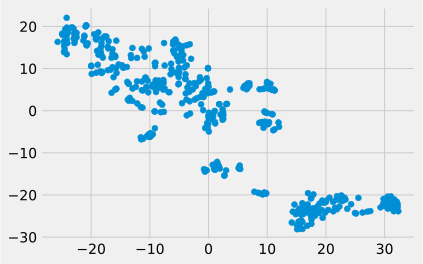

In [83]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [17]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [85]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [86]:
print(y_train[labels_train == 0].mean())

24.971204188481675


In [87]:
labels_trainDF = pd.DataFrame(labels_train)

In [88]:
labels_trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 1 columns):
0    404 non-null int32
dtypes: int32(1)
memory usage: 1.7 KB


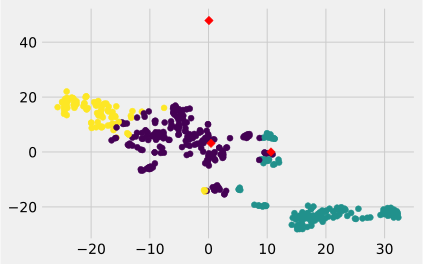

In [89]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
centers = scaler.inverse_transform(model.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.show()

# Почему центры так криво расположены? Мб другие параметры попробовать или всё ок? 

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [118]:
print("Medium price value")
print(f"Cluster 0: {round(y_train[labels_train == 0].mean())}")
print(f"Cluster 1: {round(y_train[labels_train == 1].mean())}")
print(f"Cluster 2: {round(y_train[labels_train == 2].mean())}")
print("Crime level in area")
print(f"Cluster 0: {round(X_train.loc[labels_train == 0, 'CRIM'].mean(), 0)}")
print(f"Cluster 1: {round(X_train.loc[labels_train == 0, 'CRIM'].mean(), 1)}")
print(f"Cluster 2: {round(X_train.loc[labels_train == 0, 'CRIM'].mean(), 2)}")

Medium price value
Cluster 0: 25.0
Cluster 1: 16.0
Cluster 2: 28.0
Crime level in area
Cluster 0: 0.0
Cluster 1: 0.4
Cluster 2: 0.42


# Округлил для удобства и лучшего понимания